In [1]:
#（シャープ）以降の文字はプログラムに影響しません。
# 図やグラフを図示するためのライブラリをインポートする。
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
# 数値計算やデータフレーム操作に関するライブラリをインポートする
import numpy as np
import pandas as pd
from pandas.tools import plotting # 高度なプロットを行うツールのインポート
# URL によるリソースへのアクセスを提供するライブラリをインポートする。
# import urllib # Python 2 の場合
import urllib.request # Python 3 の場合
import sklearn #機械学習のライブラリ
from sklearn.decomposition import PCA #主成分分析器

In [2]:
from matplotlib.colors import LinearSegmentedColormap
def generate_cmap(colors):
    """自分で定義したカラーマップを返す"""
    values = range(len(colors))
    vmax = np.ceil(np.max(values))
    color_list = []
    for v, c in zip(values, colors):
        color_list.append( ( v/ vmax, c) )
    return LinearSegmentedColormap.from_list('custom_cmap', color_list)
cm = generate_cmap(['mediumblue', 'limegreen', 'orangered'])

In [3]:
# ウェブ上のリソースを指定する
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
# 指定したURLからリソースをダウンロードし、名前をつける。
# urllib.urlretrieve(url, 'winequality-red.data') # Python 2 の場合
urllib.request.urlretrieve(url, 'winequality-red.data') # Python 3 の場合

('winequality-red.data', <http.client.HTTPMessage at 0x10929ff28>)

In [4]:
df = pd.read_csv('winequality-red.data', sep=';') # データの読み込み

In [5]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25,67,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15,54,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17,60,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13,40,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15,59,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15,21,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9,18,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17,102,0.99780,3.35,0.80,10.5,5


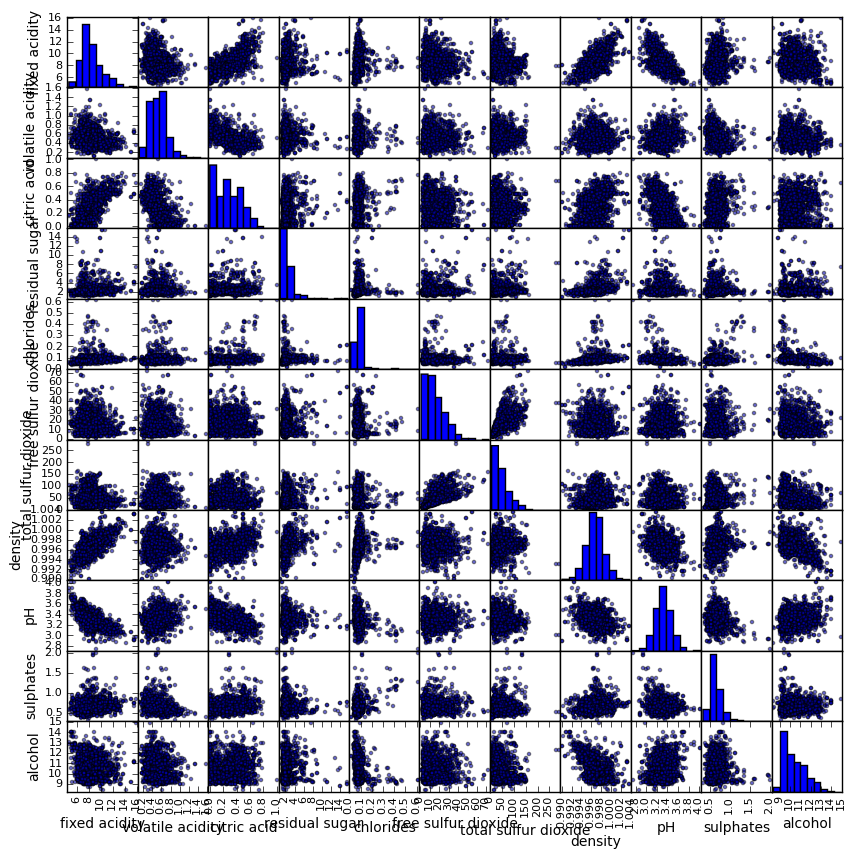

In [6]:
# 下記の関数にカラム名を入力すれば、Scatter Matrix が表示されます。
plotting.scatter_matrix(df[list(df.columns[:-1])], figsize=(10, 10)) 
plt.show()

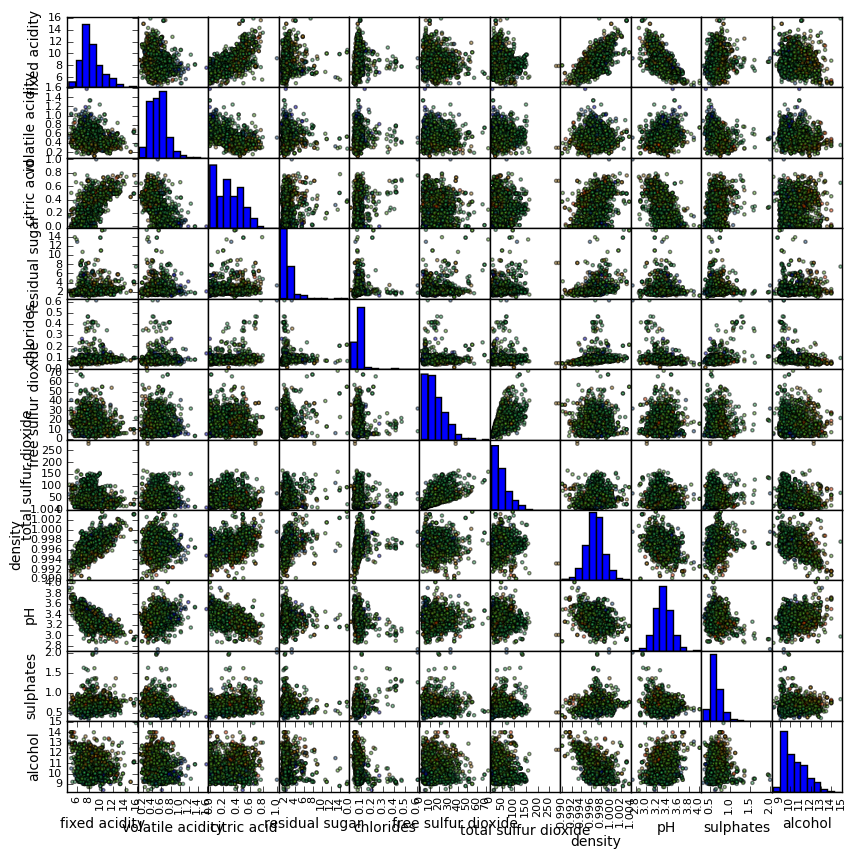

In [7]:
#color_index = list(set(df.iloc[:, 0]))
#colors = [color_index.index(i) for i in df.iloc[:, 0]]

# 下記の関数にカラム名を入力すれば、Scatter Matrix が表示されます。
plotting.scatter_matrix(df[list(df.columns[:-1])], figsize=(10, 10), c=df.iloc[:,-1], cmap=cm, alpha=0.5) 
plt.show()

In [8]:
dfs = (df.iloc[:, :-1] - df.iloc[:, :-1].mean()) / df.iloc[:, :-1].std()

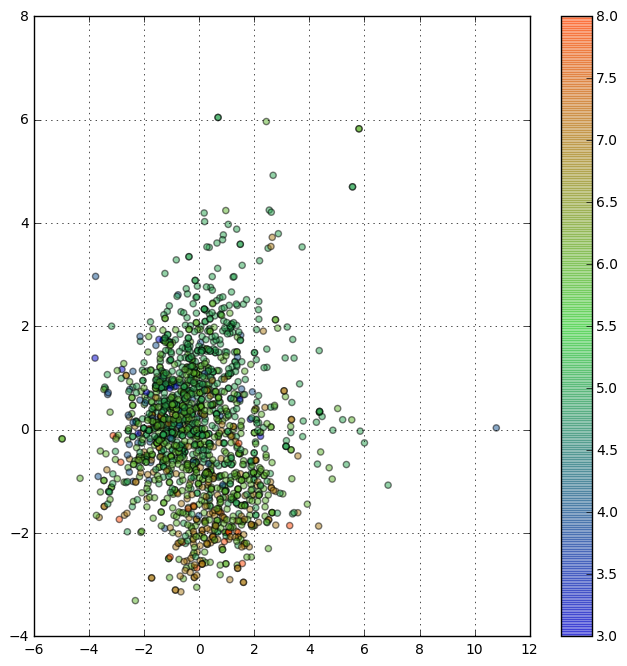

In [9]:
#color_index = list(set(df.iloc[:, 0]))
#colors = [color_index.index(i) for i in df.iloc[:, 0]]

#主成分分析の実行
pca = PCA()
pca.fit(dfs.iloc[:, 1:])
# データを主成分空間に写像 = 次元圧縮
feature = pca.transform(dfs.iloc[:, 1:])
# 第一主成分と第二主成分でプロットする
plt.figure(figsize=(8, 8))
#for x, y, name in zip(feature[:, 0], feature[:, 1], dfs.index):
#    plt.text(x, y, name, alpha=0.5, size=15)
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.5, c=df.iloc[:,-1], cmap=cm)
plt.grid()
plt.colorbar()
plt.show()